# **IPL AUCTION 2023**

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

**Loading DATASET**

In [44]:
df = pd.read_csv('/content/IPL_Squad_2023_Auction_Dataset.csv')
df.head()

,Unnamed: 0,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans


**Dropping unnecessary columns**

In [46]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [47]:
df.head()

,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans


**Basic Analysis**

In [6]:
df.shape

(568, 7)

In [7]:
df.describe()

,COST IN ₹ (CR.),Cost IN $ (000)
count,243.000000,243.000000
mean,0.687243,82.469136
std,2.511700,301.404032
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.200000,24.000000
max,18.500000,2220.000000


In [8]:
df.dtypes

Player's List       object
Base Price          object
TYPE                object
COST IN ₹ (CR.)    float64
Cost IN $ (000)    float64
2022 Squad          object
Team                object
dtype: object

In [9]:
df.isnull().sum()

Player's List        0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    325
Cost IN $ (000)    325
2022 Squad         338
Team                 0
dtype: int64

In [10]:
df = df[pd.to_numeric(df['Base Price'], errors='coerce').notna()]

In [11]:
df['Base Price'] = df['Base Price'].astype(float)

<ipython-input-11-1fdea5d7a53c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Base Price'] = df['Base Price'].astype(float)


The players who went unsold and the players who did not play last year IPL has got null values

**Data Cleaning**

In [12]:
# Replacing null values

df['COST IN ₹ (CR.)'].fillna(0, inplace = True)
df['Cost IN $ (000)'].fillna(0, inplace = True)

<ipython-input-12-e974856193c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COST IN ₹ (CR.)'].fillna(0, inplace = True)
<ipython-input-12-e974856193c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost IN $ (000)'].fillna(0, inplace = True)


In [13]:
# Replacing Null values of 2022 Squad column with DNP as the players did not play 2022 IPL Season

df['2022 Squad'].fillna('DNP', inplace = True)

<ipython-input-13-27525fa23ca9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2022 Squad'].fillna('DNP', inplace = True)


In [14]:
# Verifying changes

df.isnull().sum()

Player's List      0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2022 Squad         0
Team               0
dtype: int64

Hence Values are replaced and our Data is Cleaned for further Analysis

**Q1) List of players with base price above 1.5 crores**

In [15]:
df_above_15m = df[df['Base Price'] > 15000000].copy()

In [16]:
df_above_15m 

,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team
2,Kane Williamson,20000000.0,BATSMAN,2.00,240.0,SRH,Gujarat Titans
25,Ben Stokes,20000000.0,ALL-ROUNDER,16.25,1950.0,DNP,Chennai Super Kings
51,Rilee Rossouw,20000000.0,BATSMAN,4.60,552.0,DNP,Delhi Capitals
53,Phil Salt,20000000.0,WICKETKEEPER,2.00,240.0,DNP,Delhi Capitals
97,Sam Curran,20000000.0,ALL-ROUNDER,18.50,2220.0,DNP,Punjab Super Kings
119,Nicholas Pooran,20000000.0,WICKETKEEPER,16.00,1920.0,SRH,Lucknow Super Giants
144,Cameron Green,20000000.0,ALL-ROUNDER,17.50,2100.0,DNP,Mumbai Indians
193,Jason Holder,20000000.0,ALL-ROUNDER,5.75,690.0,LSG,Rajasthan Royals
222,Adil Rashid,20000000.0,BOWLER,2.00,240.0,DNP,Sunrisers Hyderabad
243,Tom Banton,20000000.0,WICKETKEEPER,0.00,0.0,DNP,Unsold


**Q2) List of players with base price above 50 lacks and below 1.5 crores**

In [17]:
df_below_15m = df[(df['Base Price'] < 15000000) & (df['Base Price'] > 5000000)].copy()


In [18]:
df_below_15m

,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team
26,Kyle Jamieson,10000000.0,BOWLER,1.00,120.0,DNP,Chennai Super Kings
52,Manish Pandey,10000000.0,BATSMAN,2.40,288.0,LSG,Delhi Capitals
76,David Wiese,10000000.0,ALL-ROUNDER,1.00,120.0,DNP,Kolkata Knight Riders
120,Daniel Sams,7500000.0,ALL-ROUNDER,0.75,90.0,MI,Lucknow Super Giants
169,Reece Topley,7500000.0,BOWLER,1.90,228.0,DNP,Royal Challengers Banglore
195,Joe Root,10000000.0,BATSMAN,1.00,120.0,DNP,Rajasthan Royals
219,Mayank Agarwal,10000000.0,BATSMAN,8.25,990.0,PBKS,Sunrisers Hyderabad
220,Heinrich Klaasen,10000000.0,WICKETKEEPER,5.25,630.0,DNP,Sunrisers Hyderabad
224,Akeal Hosein,10000000.0,BOWLER,1.00,120.0,DNP,Sunrisers Hyderabad
247,Mujeeb Rahman,10000000.0,BOWLER,0.00,0.0,DNP,Unsold


**Q3) Top 10 Expensive Players sold**

In [19]:
top_10_expensive_batsmen = df.nlargest(10, 'COST IN ₹ (CR.)')[["Player's List", 'COST IN ₹ (CR.)']]

In [20]:
top_10_expensive_batsmen

,Player's List,COST IN ₹ (CR.)
97,Sam Curran,18.50
144,Cameron Green,17.50
25,Ben Stokes,16.25
119,Nicholas Pooran,16.00
218,Harry Brook,13.25
219,Mayank Agarwal,8.25
0,Shivam Mavi,6.00
193,Jason Holder,5.75
50,Mukesh Kumar,5.50
220,Heinrich Klaasen,5.25


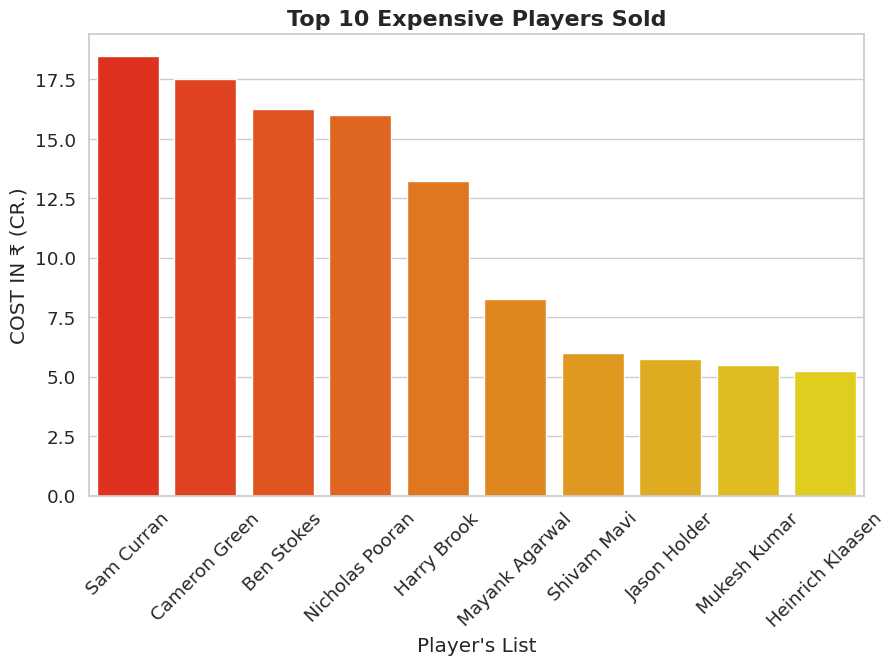

In [21]:
sns.set_theme(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(10, 6))  
sns.barplot(data=top_10_expensive_batsmen, x="Player's List", y='COST IN ₹ (CR.)', dodge = False, palette = 'autumn')


plt.xlabel("Player's List")
plt.ylabel('COST IN ₹ (CR.)')

plt.title('Top 10 Expensive Players Sold', fontweight='bold', fontsize=16)

plt.xticks(rotation=45)


plt.show()

**Q4) Top 5 expensive WicketKeepers sold**

In [26]:
filtered_data = df[df['TYPE'] == 'WICKETKEEPER']
sorted_data = filtered_data.sort_values(by='COST IN ₹ (CR.)', ascending=False)
top_5_expensive_wk = sorted_data.head()


In [33]:
top_5_expensive_wk

,Name,Base Price,TYPE,Cost,Cost IN $ (000),2022 Squad,Team
119,Nicholas Pooran,20000000.0,WICKETKEEPER,16.00,1920.0,SRH,Lucknow Super Giants
220,Heinrich Klaasen,10000000.0,WICKETKEEPER,5.25,630.0,DNP,Sunrisers Hyderabad
53,Phil Salt,20000000.0,WICKETKEEPER,2.00,240.0,DNP,Delhi Capitals
3,K.S. Bharat,2000000.0,WICKETKEEPER,1.20,144.0,DC,Gujarat Titans
77,N. Jagadeesan,2000000.0,WICKETKEEPER,0.90,108.0,CSK,Kolkata Knight Riders


In [29]:
top_5_expensive_wk = top_5_expensive_wk.rename(columns={"Player's List": 'Name'})

In [31]:
top_5_expensive_wk = top_5_expensive_wk.rename(columns={"COST IN ₹ (CR.)": 'Cost'})

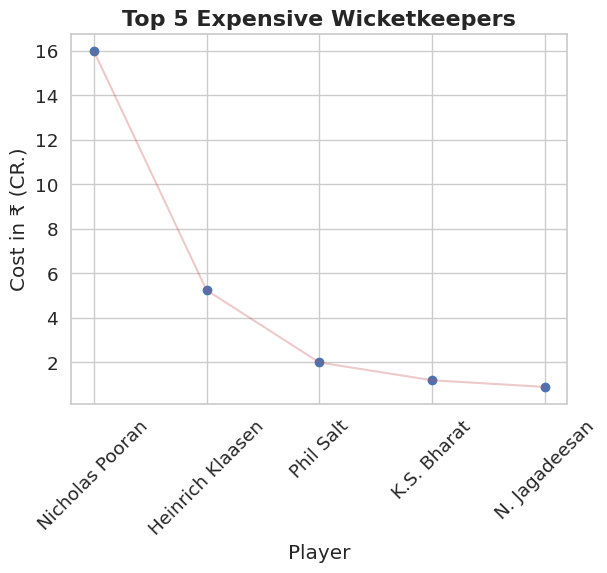

In [59]:
name = top_10_expensive_wk["Player's List"]
cost = top_10_expensive_wk['COST IN ₹ (CR.)']

plt.scatter(name, cost)

plt.xlabel('Player')
plt.ylabel('Cost in ₹ (CR.)')
plt.title('Top 5 Expensive Wicketkeepers', fontweight='bold', fontsize=16)

plt.plot(name, cost, 'r-', alpha=0.3)

plt.xticks(rotation=45)

plt.show()


**Q5) Top 5 Expensive Bowlers sold**

In [50]:
# Changing names of columns because its making analysis complicated

In [48]:
df = df.rename(columns={"Player's List": 'Name', 'COST IN ₹ (CR.)' : 'Cost in Cr', 'Cost IN $ (000)' : 'Cost in USD'})

In [49]:
df.head()

,Name,Base Price,TYPE,Cost in Cr,Cost in USD,2022 Squad,Team
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans


In [57]:
filtered_data_ = df[df['TYPE'] == 'BOWLER']
sorted_data = filtered_data_.sort_values(by='Cost in Cr', ascending=False)
top_5_expensive_bowlers = sorted_data.head()

In [58]:
top_5_expensive_bowlers

,Name,Base Price,TYPE,Cost in Cr,Cost in USD,2022 Squad,Team
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
50,Mukesh Kumar,2000000,BOWLER,5.5,660.0,NaN,Delhi Capitals
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
222,Adil Rashid,20000000,BOWLER,2.0,240.0,NaN,Sunrisers Hyderabad
169,Reece Topley,7500000,BOWLER,1.9,228.0,NaN,Royal Challengers Banglore


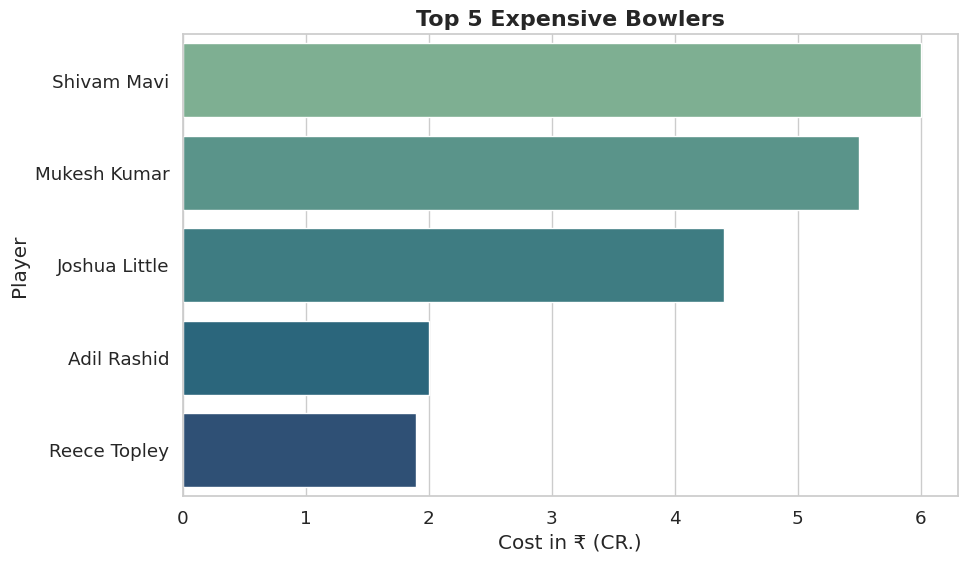

In [66]:
sns.set_theme(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Cost in Cr', y='Name', data=top_5_expensive_bowlers, dodge = False, palette = 'crest')


plt.xlabel('Cost in ₹ (CR.)')
plt.ylabel('Player')
plt.title('Top 5 Expensive Bowlers', fontweight='bold', fontsize=16)
plt.show()

**Q6) Did all teams purchase playes to their full capacity ?**

In [87]:
df = df[df['Team'] != 'Unsold']

In [88]:
team_counts = df['Team'].value_counts()

In [89]:
df_team_counts = pd.DataFrame(team_counts)

In [90]:
df_team_counts 

,Team
Gujarat Titans,25
Chennai Super Kings,25
Delhi Capitals,25
Lucknow Super Giants,25
Royal Challengers Banglore,25
Rajasthan Royals,25
Sunrisers Hyderabad,25
Mumbai Indians,24
Kolkata Knight Riders,22
Punjab Super Kings,22
